# [IAPR 2018:][iapr2018] Lab 1 ‒  Image segmentation

**Author:** first name and last name  
**Due date:** 20.04.2018

[iapr2018]: https://github.com/LTS5/iapr-2018

## Extract relevant data
We first need to extract the `lab-01-data.tar.gz` archive.
To this end, we use the [tarfile] module from the Python standard library.

[tarfile]: https://docs.python.org/3.6/library/tarfile.html

In [1]:
import tarfile
import os

data_base_path = os.path.join(os.pardir, 'data')
data_folder = 'lab-01-data'
tar_path = os.path.join(data_base_path, data_folder + '.tar.gz')
with tarfile.open(tar_path, mode='r:gz') as tar:
    tar.extractall(path=data_base_path)

## Part 1: Brain segmentation

Your goal: compute the size of the brain (in pixels) in a 2D image of a human head taken by Magnetic Resonance Imaging (MRI).
* Try as many methods as you can, the more the better.
* At least region growing and contour detection.

### 1.1 Brain image visualization

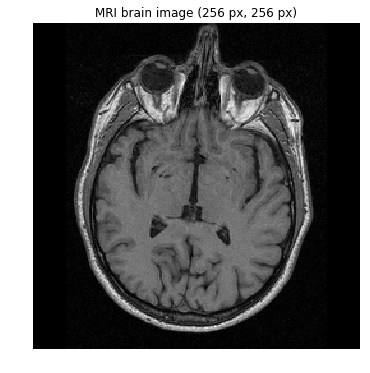

In [3]:
import skimage.io
import matplotlib.pyplot as plt
%matplotlib inline

# Load image
data_path = os.path.join(data_base_path, data_folder)
brain_im = skimage.io.imread(os.path.join(data_path, 'brain-slice40.tiff'))
im_h, im_w = brain_im.shape

fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.imshow(brain_im, cmap='gray')
ax.set_title('MRI brain image ({} px, {} px)'.format(im_h, im_w))
ax.axis('off')
plt.show()

### 1.2 Region growing
Add your implementation and discussion

### 1.3 Contour detection
Add your implementation and discussion

### 1.4 Additional method(s)
Add your implementation and discussion

## Part 2: Shape/color segmentation

You will find hereafter a picture of shapes of different colors, taken under four different illuminations.
We ask you to create a routine to:
1. Count the number of shapes of each color.
1. Compute the total area (in pixels) of each color.

One specific challenge is to be robust to illumination changes.
Try to have the same routine(s) running on the four images, and giving (approximatively) the same results.
Therefore some kind of intensity normalization should probably be used.
To help you, you will also find a reference image (palette) with disks of each possible color, that you can use as references.

**Note:** the routine(s) that you will write for this part will be useful for the robot project as well, so pay special attention to it.

### 2.1 Images and palette visualization

In [4]:
# Load images
im_names = ['arena-shapes-01', 'arena-shapes-02', 'arena-shapes-03', 'arena-shapes-04']
filenames = [os.path.join(data_path, name) + '.png' for name in im_names]
ic = skimage.io.imread_collection(filenames)
images = skimage.io.concatenate_images(ic)
print('Number of images: ', images.shape[0])
print('Image size: {}, {} '.format(images.shape[1], images.shape[2]))
print('Number of color channels: ', images.shape[-1])

Number of images:  4
Image size: 480, 640 
Number of color channels:  3


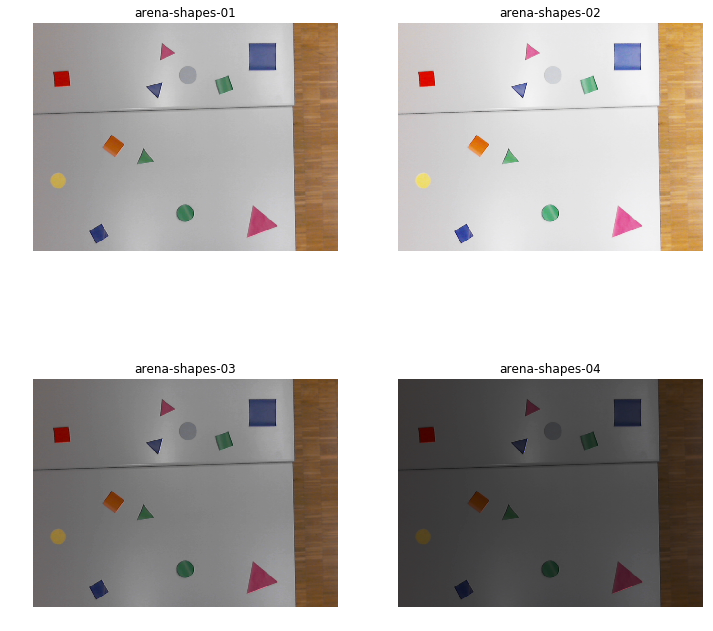

In [5]:
# Plot images
fig, axes = plt.subplots(2, 2, figsize=(12, 12))
for ax, im, nm in zip(axes.ravel(), images, im_names):
    ax.imshow(im)
    ax.axis('off')
    ax.set_title(nm)
plt.show()

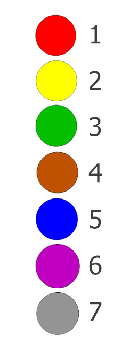

In [6]:
# Load and plot palette
palette = skimage.io.imread(os.path.join(data_path, 'arena-palette.png'))
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.imshow(palette)
ax.axis('off')
plt.show()

In [214]:
# Get the colors values(in RGB) from the palette
img = cv2.imread(os.path.join(data_path, 'arena-palette.png'))
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
def get_colorsample(palette, numcolor):
    
    '''
    Input : image called with skimage
    
    output : list of colors RGB values in the palette
    '''
    height, width, rgb = palette.shape
    
    colorlist = []
    start_h = int(height/numcolor/2)
    
    for i in range(numcolor):
        colorlist.append(palette[start_h, 40,:])
        start_h += 88
        
    return colorlist


lis = get_colorsample(hsv,7)
lis

[array([  0, 255, 254], dtype=uint8),
 array([ 30, 255, 255], dtype=uint8),
 array([ 59, 255, 190], dtype=uint8),
 array([ 13, 255, 191], dtype=uint8),
 array([120, 255, 254], dtype=uint8),
 array([150, 255, 192], dtype=uint8),
 array([  0,   0, 148], dtype=uint8)]

### 2.2 Number of shapes of each color
Add your implementation and discussion

0.008997802593229296
116
[(slice(1, 479, None), slice(1, 639, None))]


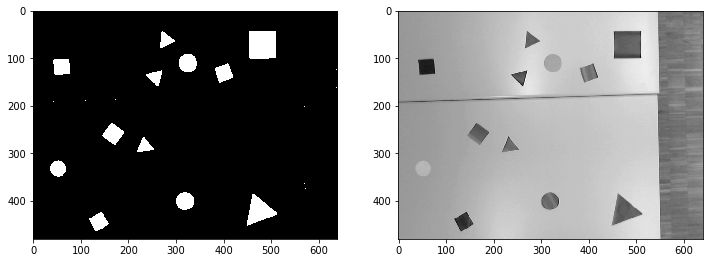

In [287]:
from skimage.filters import roberts, sobel, scharr, prewitt, threshold_otsu, threshold_mean, threshold_minimum, gaussian, median
from skimage.color import rgb2gray
from scipy import ndimage as ndi
from skimage.morphology import watershed
from skimage.feature import canny


gray = rgb2gray(images[0])
edge_sobel = sobel(gray)
edges_canny = canny(gray)



thresh = threshold_mean(edge_sobel)
print(thresh)
binary = edge_sobel < thresh

fill_coins = ndi.binary_fill_holes(edges_canny)
labeled_coins, numObj = ndi.label(fill_coins)

after_median = median(fill_coins)
after_gaus = gaussian(fill_coins,sigma=10)
print(numObj)
loc = ndi.find_objects(fill_coins)
print(loc)

markers = np.zeros_like(gray)
markers[gray < 30] = 1
markers[gray > 150] = 2
segmentation = watershed(edges_canny, markers)


fig, ax = plt.subplots(1, 2, figsize=(12,12))

#ax[0].imshow(images[0])
ax[0].imshow(after_median, cmap='gray')
ax[1].imshow(gray, cmap='gray')

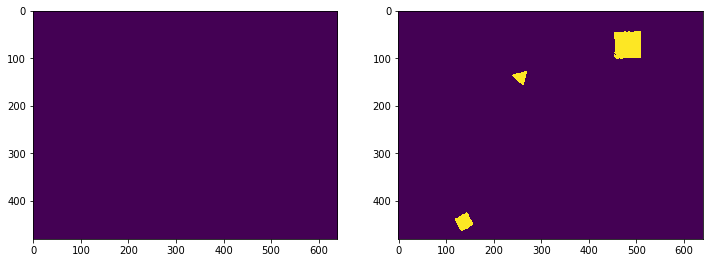

In [233]:
test_img = cv2.imread(os.path.join(data_path, 'arena-shapes-01.png'))
hsv= cv2.cvtColor(test_img, cv2.COLOR_BGR2HSV)
lower_red = np.array([110,50,50])
upper_red = np.array([130,255,255])

lower_red2 = lis[4] - np.array(50)
upper_red2 = lis[4]

mask = cv2.inRange(hsv, lower_red, upper_red)
mask2 = cv2.inRange(hsv, lower_red2, upper_red2)

fig, ax = plt.subplots(1, 2, figsize=(12,12))

#ax[0].imshow(images[0])
ax[0].imshow(mask2)
ax[1].imshow(mask)
#ax[2].imshow(mask, cmap='gray')
#ax[3].imshow(mask)


In [226]:
lis[5] - np.array(50)

array([100, 205, 142], dtype=uint8)

In [ ]:
# define the list of boundaries
boundaries = [
    ([17, 15, 100], [50, 56, 200]),
    ([86, 31, 4], [220, 88, 50]),
    ([25, 146, 190], [62, 174, 250]),
    ([103, 86, 65], [145, 133, 128])
]

    # create NumPy arrays from the boundaries
    lower = np.array(lower, dtype = "uint8")
    upper = np.array(upper, dtype = "uint8")
 
    # find the colors within the specified boundaries and apply
    # the mask
    mask = cv2.inRange(test_img, lower, upper)
    print(mask)
    output = cv2.bitwise_and(test_img, test_img, mask = mask)
    
    
    cv2.imshow("images", np.hstack([test_img, output]))
    cv2.waitKey(0)

In [ ]:
import cv2
test_img = images[3]

# Change image into grayscale image
#gray = skimage.color.rgb2gray(test_img)
gray = cv2.cvtColor( test_img, cv2.COLOR_BGR2HSV)
blurred = cv2.GaussianBlur(gray, (5, 5), 0)
thresh = cv2.threshold(blurred, 60, 255, cv2.THRESH_BINARY)[1]
laplacian = cv2.Laplacian(gray,cv2.CV_8U)
#sobel = cv2.Sobel(test_img)
#peri = cv2.arcLength(test_img, True)
#approx = cv2.approxPolyDP(test_img, 0.04 * peri, True)


In [175]:
import cv2
test_img = cv2.imread(os.path.join(data_path, 'arena-shapes-01.png'))
hsv2= cv2.cvtColor(test_img, cv2.COLOR_BGR2HSV)
gray2= cv2.cvtColor(test_img, cv2.COLOR_RGB2GRAY)
imgblur = cv2.medianBlur(test_img,5)
imgblur3 = cv2.medianBlur(img,5)

imgblur2 = cv2.medianBlur(gray2,5)
gray3= cv2.cvtColor(imgblur, cv2.COLOR_RGB2GRAY)

upper_red = lis[0]
lower_red = (lis[0]/2).astype(int)

print(lower_red, upper_red)
#mask = cv2.inRange(hsv2, np.array([0, 179, 178]), np.array([255, 255, 255]))
mask = cv2.inRange(hsv, lis[0], lis[1])

th3 = cv2.adaptiveThreshold(imgblur2,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11,2)
output = cv2.bitwise_and(images[0], images[0], mask= mask)

[ 60 127 127] [120 255 254]


error: C:\projects\opencv-python\opencv\modules\core\src\arithm.cpp:241: error: (-215) (mtype == 0 || mtype == 1) && _mask.sameSize(*psrc1) in function cv::binary_op


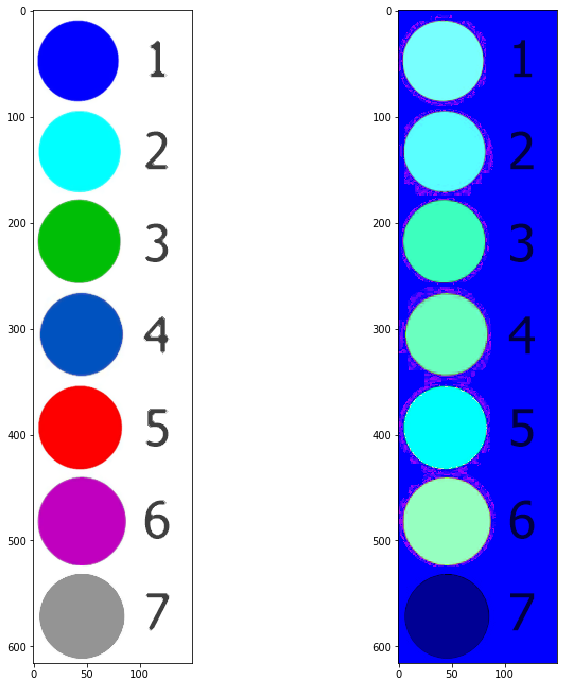

In [172]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

fig, ax = plt.subplots(1, 2, figsize=(12,12))

ax[0].imshow(imgblur3)
ax[1].imshow(hsv)


### 2.3 Total area (in pixels) of each color
Add your implementation and discussion